Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2 
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

Pre-processing

In [2]:
raw_csv_data = pd.read_csv("Index2020.csv") 
df_com=raw_csv_data.copy()
df_com.date = pd.to_datetime(df_com.date, dayfirst = True)
df_com.set_index("date", inplace=True)
df_com=df_com.asfreq('b')
df_com=df_com.fillna(method='ffill')

In [3]:
df_com['market_value']=df_com.spx

In [4]:
del df_com['dax']
size = int(len(df_com)*0.8)
df, df_test = df_com.iloc[:size], df_com.iloc[size:]

LLR test

In [5]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

Returns

In [6]:
df['returns'] = df.market_value.pct_change(1)*100

ARMA

In [7]:
model_ret_ar_1_ma_1 = ARMA(df.returns[1:], order=(1,1))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
results_ret_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 4191
Model:                     ARMA(1, 1)   Log Likelihood               -6842.933
Method:                       css-mle   S.D. of innovations              1.238
Date:                Mon, 02 Mar 2020   AIC                          13693.866
Time:                        19:59:23   BIC                          13719.228
Sample:                    01-04-2000   HQIC                         13702.835
                         - 01-26-2016                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0142      0.016      0.906      0.365      -0.017       0.045
ar.L1.returns     0.5185      0.133      3.911      0.000       0.259       0.778
ma.L1.returns    -0.6044      0.124     -4.880      0.000      -0.847      -0.362
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9287           +0.0000j            1.9287            0.0000
MA.1            1.6545           +0.0000j            1.6545            0.0000
-----------------------------------------------------------------------------
"""

In [8]:
model_ret_ar_1 = ARMA (df.returns[1:], order = (1,0)) 
model_ret_ma_1 = ARMA (df.returns[1:], order = (0,1)) 
results_ret_ar_1 = model_ret_ar_1.fit()
results_ret_ma_1 = model_ret_ma_1.fit()

In [9]:
print("\nARMA vs AR ", LLR_test(results_ret_ar_1_ma_1, results_ret_ar_1))
print("\nARMA vs MA ", LLR_test(results_ret_ar_1_ma_1, results_ret_ma_1))


ARMA vs AR  1.0

ARMA vs MA  1.0


In [10]:
model_ret_ar_3_ma_2 = ARMA(df.returns[1:], order=(3,2))
results_ret_ar_3_ma_2 = model_ret_ar_3_ma_2.fit()
results_ret_ar_3_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 4191
Model:                     ARMA(3, 2)   Log Likelihood               -6841.450
Method:                       css-mle   S.D. of innovations              1.238
Date:                Mon, 02 Mar 2020   AIC                          13696.900
Time:                        19:59:24   BIC                          13741.284
Sample:                    01-04-2000   HQIC                         13712.596
                         - 01-26-2016                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0143      0.015      0.941      0.347      -0.015       0.044
ar.L1.returns     0.4855      0.376      1.293      0.196      -0.251       1.222
ar.L2.returns     0.2002      0.232      0.864      0.387      -0.254       0.654
ar.L3.returns     0.0359      0.022      1.599      0.110      -0.008       0.080
ma.L1.returns    -0.5749      0.375     -1.531      0.126      -1.311       0.161
ma.L2.returns    -0.2045      0.259     -0.790      0.430      -0.712       0.303
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2588           -0.0000j            1.2588           -0.0000
AR.2           -3.4154           -3.2324j            4.7025           -0.3794
AR.3           -3.4154           +3.2324j            4.7025            0.3794
MA.1            1.2147           +0.0000j            1.2147            0.0000
MA.2           -4.0263           +0.0000j            4.0263            0.5000
-----------------------------------------------------------------------------
"""

In [11]:
model_ret_ar_3_ma_1 = ARMA(df.returns[1:], order=(3,1))
results_ret_ar_3_ma_1 = model_ret_ar_3_ma_1.fit()
results_ret_ar_3_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 4191
Model:                     ARMA(3, 1)   Log Likelihood               -6841.689
Method:                       css-mle   S.D. of innovations              1.238
Date:                Mon, 02 Mar 2020   AIC                          13695.378
Time:                        19:59:25   BIC                          13733.422
Sample:                    01-04-2000   HQIC                         13708.832
                         - 01-26-2016                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0143      0.015      0.944      0.345      -0.015       0.044
ar.L1.returns     0.7511      0.140      5.351      0.000       0.476       1.026
ar.L2.returns     0.0205      0.023      0.882      0.378      -0.025       0.066
ar.L3.returns     0.0269      0.021      1.297      0.195      -0.014       0.068
ma.L1.returns    -0.8406      0.139     -6.035      0.000      -1.114      -0.568
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2246           -0.0000j            1.2246           -0.0000
AR.2           -0.9921           -5.4167j            5.5068           -0.2788
AR.3           -0.9921           +5.4167j            5.5068            0.2788
MA.1            1.1896           +0.0000j            1.1896            0.0000
-----------------------------------------------------------------------------
"""

In [12]:
LLR_test(results_ret_ar_3_ma_1, results_ret_ar_3_ma_2)

0.489

In [13]:
model_ret_ar_2_ma_2 = ARMA(df.returns[1:], order=(2,2))
results_ret_ar_2_ma_2 = model_ret_ar_2_ma_2.fit()
results_ret_ar_2_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 4191
Model:                     ARMA(2, 2)   Log Likelihood               -6842.921
Method:                       css-mle   S.D. of innovations              1.238
Date:                Mon, 02 Mar 2020   AIC                          13697.842
Time:                        19:59:26   BIC                          13735.886
Sample:                    01-04-2000   HQIC                         13711.296
                         - 01-26-2016                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0142      0.016      0.903      0.367      -0.017       0.045
ar.L1.returns    -0.0089      0.695     -0.013      0.990      -1.371       1.353
ar.L2.returns     0.2516      0.385      0.654      0.513      -0.503       1.006
ma.L1.returns    -0.0767      0.694     -0.111      0.912      -1.437       1.283
ma.L2.returns    -0.2987      0.435     -0.687      0.492      -1.151       0.554
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.9760           +0.0000j            1.9760            0.5000
AR.2            2.0115           +0.0000j            2.0115            0.0000
MA.1            1.7057           +0.0000j            1.7057            0.0000
MA.2           -1.9624           +0.0000j            1.9624            0.5000
-----------------------------------------------------------------------------
"""

In [14]:
print("\n ARMA(3,2): \tLL = ", results_ret_ar_3_ma_2.llf, "\tAIC = ", results_ret_ar_3_ma_2.aic)


 ARMA(3,2): 	LL =  -6841.449786553994 	AIC =  13696.899573107989


Residuals for Returns

In [15]:
df['res_ret_ar_3_ma_2'] = results_ret_ar_3_ma_2.resid[1:]

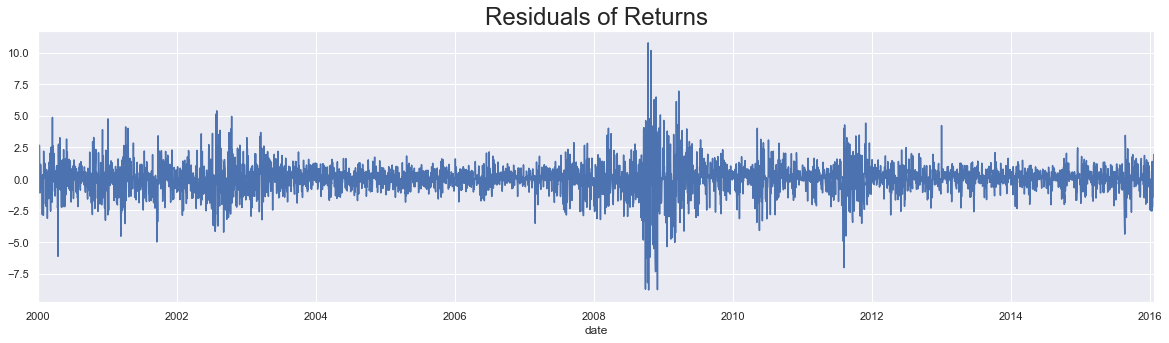

In [16]:
df.res_ret_ar_3_ma_2.plot(figsize = (20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

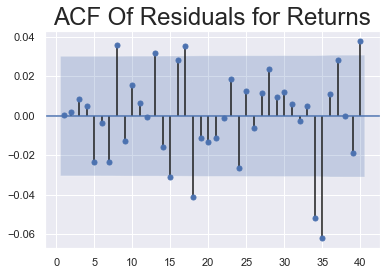

In [17]:
sgt.plot_acf(df.res_ret_ar_3_ma_2[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

Reevaluating Model Selection

In [18]:
model_ret_ar_5_ma_1 = ARMA(df.returns[1:], order=(5,1))
results_ret_ar_5_ma_1 = model_ret_ar_5_ma_1.fit()
results_ret_ar_5_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 4191
Model:                     ARMA(5, 1)   Log Likelihood               -6839.812
Method:                       css-mle   S.D. of innovations              1.237
Date:                Mon, 02 Mar 2020   AIC                          13695.623
Time:                        19:59:28   BIC                          13746.349
Sample:                    01-04-2000   HQIC                         13713.562
                         - 01-26-2016                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0142      0.015      0.929      0.353      -0.016       0.044
ar.L1.returns     0.4603      0.210      2.190      0.029       0.048       0.872
ar.L2.returns    -0.0046      0.025     -0.183      0.855      -0.054       0.045
ar.L3.returns     0.0222      0.020      1.085      0.278      -0.018       0.062
ar.L4.returns    -0.0112      0.017     -0.652      0.514      -0.045       0.022
ar.L5.returns    -0.0286      0.017     -1.644      0.100      -0.063       0.005
ma.L1.returns    -0.5497      0.210     -2.619      0.009      -0.961      -0.138
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5491           -0.7309j            1.7129           -0.0702
AR.2            1.5491           +0.7309j            1.7129            0.0702
AR.3           -0.4738           -2.1130j            2.1655           -0.2851
AR.4           -0.4738           +2.1130j            2.1655            0.2851
AR.5           -2.5405           -0.0000j            2.5405           -0.5000
MA.1            1.8193           +0.0000j            1.8193            0.0000
-----------------------------------------------------------------------------
"""

In [19]:
print("ARMA(5,1):  \t LL = ",results_ret_ar_5_ma_1.llf,"\t AIC = ",results_ret_ar_5_ma_1.aic)

ARMA(5,1):  	 LL =  -6839.811742437473 	 AIC =  13695.623484874946


In [20]:
print("ARMA(3,2):  \t LL = ",results_ret_ar_3_ma_2.llf,"\t AIC = ",results_ret_ar_3_ma_2.aic)

ARMA(3,2):  	 LL =  -6841.449786553994 	 AIC =  13696.899573107989


Residuals for the New Model

In [21]:
df['res_ret_ar_5_ma_1'] = results_ret_ar_5_ma_1.resid

ARMA Models for Prices

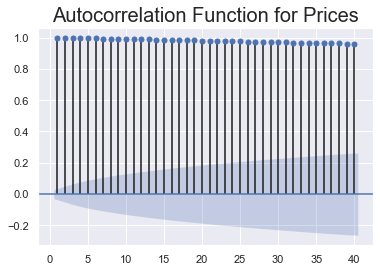

In [22]:
sgt.plot_acf(df.market_value, unbiased=True, zero = False, lags = 40)
plt.title("Autocorrelation Function for Prices",size=20)
plt.show()

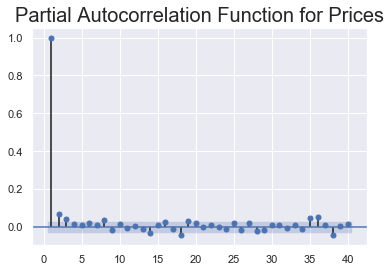

In [23]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("Partial Autocorrelation Function for Prices",size=20)
plt.show()

In [24]:
model_ar_1_ma_1 = ARMA(df.market_value, order=(1,1))
results_ar_1_ma_1 = model_ar_1_ma_1.fit()
results_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 4192
Model:                     ARMA(1, 1)   Log Likelihood              -17259.395
Method:                       css-mle   S.D. of innovations             14.843
Date:                Mon, 02 Mar 2020   AIC                          34526.791
Time:                        19:59:29   BIC                          34552.154
Sample:                    01-03-2000   HQIC                         34535.760
                         - 01-26-2016                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1457.0923    212.250      6.865      0.000    1041.091    1873.094
ar.L1.market_value     0.9992      0.001   1781.271      0.000       0.998       1.000
ma.L1.market_value    -0.0716      0.016     -4.456      0.000      -0.103      -0.040
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0008           +0.0000j            1.0008            0.0000
MA.1           13.9646           +0.0000j           13.9646            0.0000
-----------------------------------------------------------------------------
"""

In [25]:
df['res_ar_1_ma_1'] = results_ar_1_ma_1.resid

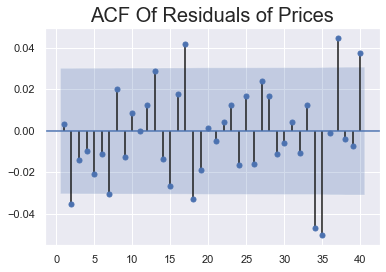

In [26]:
sgt.plot_acf(df.res_ar_1_ma_1, zero = False, lags = 40)
plt.title("ACF Of Residuals of Prices",size=20)
plt.show()

In [27]:
model_ar_6_ma_6 = ARMA(df.market_value, order=(6,6))
results_ar_6_ma_6 = model_ar_6_ma_6.fit(start_ar_lags = 11)
results_ar_6_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 4192
Model:                     ARMA(6, 6)   Log Likelihood              -17248.599
Method:                       css-mle   S.D. of innovations             14.803
Date:                Mon, 02 Mar 2020   AIC                          34525.197
Time:                        20:00:53   BIC                          34613.970
Sample:                    01-03-2000   HQIC                         34556.590
                         - 01-26-2016                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1333.5304    518.991      2.569      0.010     316.327    2350.733
ar.L1.market_value     1.0923        nan        nan        nan         nan         nan
ar.L2.market_value     1.0765      0.007    156.457      0.000       1.063       1.090
ar.L3.market_value    -1.1827        nan        nan        nan         nan         nan
ar.L4.market_value    -0.9347        nan        nan        nan         nan         nan
ar.L5.market_value     1.0269        nan        nan        nan         nan         nan
ar.L6.market_value    -0.0785      0.005    -14.500      0.000      -0.089      -0.068
ma.L1.market_value    -0.1650      0.013    -12.449      0.000      -0.191      -0.139
ma.L2.market_value    -1.2020      0.012   -104.262      0.000      -1.225      -1.179
ma.L3.market_value     0.0900      0.021      4.242      0.000       0.048       0.132
ma.L4.market_value     0.9812      0.018     53.315      0.000       0.945       1.017
ma.L5.market_value    -0.1481      0.016     -9.261      0.000      -0.179      -0.117
ma.L6.market_value    -0.0199      0.016     -1.267      0.205      -0.051       0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8869           -0.4708j            1.0041           -0.4223
AR.2           -0.8869           +0.4708j            1.0041            0.4223
AR.3            0.9313           -0.4311j            1.0263           -0.0690
AR.4            0.9313           +0.4311j            1.0263            0.0690
AR.5            1.0003           -0.0000j            1.0003           -0.0000
AR.6           11.9938           -0.0000j           11.9938           -0.0000
MA.1           -0.8851           -0.4690j            1.0017           -0.4225
MA.2           -0.8851           +0.4690j            1.0017            0.4225
MA.3            0.9376           -0.4250j            1.0294           -0.0677
MA.4            0.9376           +0.4250j            1.0294            0.0677
MA.5            4.0694           -0.0000j            4.0694           -0.0000
MA.6          -11.6166           -0.0000j           11.6166           -0.5000
-----------------------------------------------------------------------------
"""

ARMA for Returns vs ARMA for Prices

In [29]:
print("ARMA(5,1):  \t LL = ", results_ret_ar_5_ma_1.llf, "\t AIC = ", results_ret_ar_5_ma_1.aic)

ARMA(5,1):  	 LL =  -6839.811742437473 	 AIC =  13695.623484874946
